In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [28]:
df=pd.read_excel('customer churn data_usecase2_Hackathon.xlsx')

In [29]:
df.head()

,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,...,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category,Recommendation
0,5522-JBWMO,Male,0,No,Yes,1.0,Yes,No,general loan,No,...,No,No,Month-to-month,No,44.0,44,No,My Credit Card is not generating OTP.,Credit Card,NaN
1,5275-PMFUT,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,...,Yes,Yes,Two year,Yes,64.8,4719.75,No,The Current Account charges are too high.,Current Account,NaN
2,5609-CEBID,Female,1,No,No,20.0,Yes,Yes,top up loan,No,...,No,Yes,Month-to-month,Yes,94.1,1782.4,Yes,The loan prepayment charges are too high.,Loans,NaN
3,4381-MHQDC,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,...,No,No,Two year,Yes,65.0,2879.9,No,The Savings Account opening process was very s...,Savings Account,NaN
4,6353-BRMMA,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,...,Yes,Yes,Month-to-month,Yes,104.1,5645.8,No,The loan documentation process is very complic...,Loans,NaN


In [30]:
df.shape

(999, 23)

In [31]:
df.isnull().sum()

,0
customerID,0
Gender,0
Senior Citizen,0
Marital Status,0
Dependents,2
tenure in months,5
Priority Account,2
Credit Cards,2
Loan Account,1
Netbanking,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     999 non-null    object 
 1   Gender                         999 non-null    object 
 2   Senior Citizen                 999 non-null    int64  
 3   Marital Status                 999 non-null    object 
 4   Dependents                     997 non-null    object 
 5   tenure in months               994 non-null    float64
 6   Priority Account               997 non-null    object 
 7   Credit Cards                   997 non-null    object 
 8   Loan Account                   998 non-null    object 
 9   Netbanking                     998 non-null    object 
 10  Debit Card                     999 non-null    object 
 11  MobileApp                      999 non-null    object 
 12  TechSupport Availed            998 non-null    obj

In [33]:
df.columns

Index(['customerID', 'Gender', 'Senior Citizen', 'Marital Status',
       'Dependents', 'tenure in months', 'Priority Account', 'Credit Cards',
       'Loan Account', 'Netbanking', 'Debit Card', 'MobileApp',
       'TechSupport Availed', 'Zero Balance Account', 'FDs',
       'Interest Deposited', 'Paperless Banking',
       'Monthly Average Balance (USD)', 'Yearly Average Balance (USD)',
       'Churn', 'Customer Feedback', 'Category', 'Recommendation'],
      dtype='object')

In [34]:
df.drop(columns=['customerID','Customer Feedback', 'Category', 'Recommendation'],axis=1,inplace=True)

In [35]:
le=LabelEncoder()

In [36]:
def convert_yes_no(df, column):
    df[column] = df[column].replace({'Yes':1,'No':0})
    return df

yes_no_columns = [ 'Senior Citizen', 'Marital Status', 'Dependents', 'Priority Account', 'Credit Cards',
                  'Netbanking', 'Debit Card', 'MobileApp', 'TechSupport Availed',
                   'Zero Balance Account', 'FDs', 'Interest Deposited', 'Paperless Banking','Churn']

for col in yes_no_columns:
    df = convert_yes_no(df,col)


<ipython-input-36-2cccca76c985>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'Yes':1,'No':0})


In [37]:
df

,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn
0,Male,0,0,1.0,1.0,1.0,0.0,general loan,0.0,0,0,0.0,0.0,0.0,Month-to-month,0.0,44.00,44,0.0
1,Male,0,1,1.0,72.0,0.0,0.0,general loan,1.0,1,1,1.0,1.0,1.0,Two year,1.0,64.80,4719.75,0.0
2,Female,1,0,0.0,20.0,1.0,1.0,top up loan,0.0,1,1,0.0,0.0,1.0,Month-to-month,1.0,94.10,1782.4,1.0
3,Female,0,0,0.0,47.0,1.0,1.0,general loan,1.0,0,1,1.0,0.0,0.0,Two year,1.0,65.00,2879.9,0.0
4,Female,0,1,1.0,54.0,1.0,1.0,top up loan,1.0,1,0,0.0,1.0,1.0,Month-to-month,1.0,104.10,5645.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Male,0,0,0.0,44.0,1.0,0.0,No,0.0,0,0,0.0,0.0,0.0,Two year,0.0,20.40,905.55,0.0
995,Female,1,1,0.0,66.0,0.0,0.0,general loan,0.0,1,1,0.0,1.0,0.0,One year,0.0,45.55,3027.25,0.0
996,Female,0,1,1.0,9.0,1.0,0.0,general loan,1.0,0,0,0.0,0.0,0.0,One year,0.0,48.60,422.3,0.0
997,Male,0,1,1.0,29.0,1.0,0.0,general loan,0.0,0,1,1.0,1.0,1.0,Two year,0.0,75.55,2054.4,0.0


In [38]:
df['Gender']=le.fit_transform(df['Gender'])

In [39]:
df['Loan Account']=le.fit_transform(df['Loan Account'])

In [40]:
df['Interest Deposited']=le.fit_transform(df['Interest Deposited'])

In [41]:
df['Loan Account'].unique()

array([1, 2, 0, 3])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         999 non-null    int64  
 1   Senior Citizen                 999 non-null    int64  
 2   Marital Status                 999 non-null    int64  
 3   Dependents                     997 non-null    float64
 4   tenure in months               994 non-null    float64
 5   Priority Account               997 non-null    float64
 6   Credit Cards                   997 non-null    float64
 7   Loan Account                   999 non-null    int64  
 8   Netbanking                     998 non-null    float64
 9   Debit Card                     999 non-null    int64  
 10  MobileApp                      999 non-null    int64  
 11  TechSupport Availed            998 non-null    float64
 12  Zero Balance Account           997 non-null    flo

In [43]:
df['Yearly Average Balance (USD)'] = df['Yearly Average Balance (USD)'].replace(' ', np.nan)

<ipython-input-43-d647a68655f7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Yearly Average Balance (USD)'] = df['Yearly Average Balance (USD)'].replace(' ', np.nan)


In [44]:
df['Yearly Average Balance (USD)']=df['Yearly Average Balance (USD)'].astype(float)

In [45]:
df.isnull().sum()

,0
Gender,0
Senior Citizen,0
Marital Status,0
Dependents,2
tenure in months,5
Priority Account,2
Credit Cards,2
Loan Account,0
Netbanking,1
Debit Card,0


In [46]:
for cols in ['Dependents','Priority Account', 'Credit Cards', 'Netbanking', 'TechSupport Availed', 'Zero Balance Account', 'FDs','Paperless Banking',]:
  df.fillna(df[cols].mode(), inplace=True)
  #df[cols].fillna(df[cols].mode(), inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         999 non-null    int64  
 1   Senior Citizen                 999 non-null    int64  
 2   Marital Status                 999 non-null    int64  
 3   Dependents                     997 non-null    float64
 4   tenure in months               994 non-null    float64
 5   Priority Account               997 non-null    float64
 6   Credit Cards                   997 non-null    float64
 7   Loan Account                   999 non-null    int64  
 8   Netbanking                     998 non-null    float64
 9   Debit Card                     999 non-null    int64  
 10  MobileApp                      999 non-null    int64  
 11  TechSupport Availed            998 non-null    float64
 12  Zero Balance Account           997 non-null    flo

In [48]:
for cols in ['tenure in months','Monthly Average Balance (USD)','Yearly Average Balance (USD)']:
  df.fillna(df[cols].mean(), inplace=True)

In [49]:
df.isnull().sum()

,0
Gender,0
Senior Citizen,0
Marital Status,0
Dependents,0
tenure in months,0
Priority Account,0
Credit Cards,0
Loan Account,0
Netbanking,0
Debit Card,0


In [ ]:
df=df.dropna()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.shape

(967, 19)

In [ ]:
df['Churn']=df['Churn'].astype(int)

<ipython-input-49-ad9571f41422>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn']=df['Churn'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 998
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         967 non-null    int64  
 1   Senior Citizen                 967 non-null    int64  
 2   Marital Status                 967 non-null    int64  
 3   Dependents                     967 non-null    float64
 4   tenure in months               967 non-null    float64
 5   Priority Account               967 non-null    float64
 6   Credit Cards                   967 non-null    float64
 7   Loan Account                   967 non-null    int64  
 8   Netbanking                     967 non-null    float64
 9   Debit Card                     967 non-null    int64  
 10  MobileApp                      967 non-null    int64  
 11  TechSupport Availed            967 non-null    float64
 12  Zero Balance Account           967 non-null    float64


In [ ]:
  df['Churn'].unique()

array([0, 1])

In [ ]:
df

,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn
0,1,0,0,1.0,1.000000,1.0,0.0,1,0.0,0,0,0.0,0.0,0.0,0,0.0,44.00,44.00,0
1,1,0,1,1.0,72.000000,0.0,0.0,1,1.0,1,1,1.0,1.0,1.0,2,1.0,64.80,4719.75,0
2,0,1,0,0.0,20.000000,1.0,1.0,2,0.0,1,1,0.0,0.0,1.0,0,1.0,94.10,1782.40,1
3,0,0,0,0.0,47.000000,1.0,1.0,1,1.0,0,1,1.0,0.0,0.0,2,1.0,65.00,2879.90,0
4,0,0,1,1.0,54.000000,1.0,1.0,2,1.0,1,0,0.0,1.0,1.0,0,1.0,104.10,5645.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,0,0,0.0,44.000000,1.0,0.0,0,0.0,0,0,0.0,0.0,0.0,2,0.0,20.40,905.55,0
995,0,1,1,0.0,66.000000,0.0,0.0,1,0.0,1,1,0.0,1.0,0.0,1,0.0,45.55,3027.25,0
996,0,0,1,1.0,9.000000,1.0,0.0,1,1.0,0,0,0.0,0.0,0.0,1,0.0,48.60,422.30,0
997,1,0,1,1.0,29.000000,1.0,0.0,1,0.0,0,1,1.0,1.0,1.0,2,0.0,75.55,2054.40,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 0 to 998
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         967 non-null    int64  
 1   Senior Citizen                 967 non-null    int64  
 2   Marital Status                 967 non-null    int64  
 3   Dependents                     967 non-null    float64
 4   tenure in months               967 non-null    float64
 5   Priority Account               967 non-null    float64
 6   Credit Cards                   967 non-null    float64
 7   Loan Account                   967 non-null    int64  
 8   Netbanking                     967 non-null    float64
 9   Debit Card                     967 non-null    int64  
 10  MobileApp                      967 non-null    int64  
 11  TechSupport Availed            967 non-null    float64
 12  Zero Balance Account           967 non-null    float64


In [ ]:
df['Dependents']=df['Dependents'].astype(int)

<ipython-input-54-c4bf3671c413>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents']=df['Dependents'].astype(int)


<Axes: xlabel='Churn', ylabel='count'>

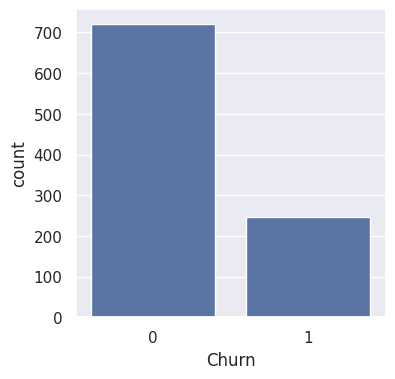

In [ ]:
sns.countplot(x="Churn", data=df)

<Axes: xlabel='Senior Citizen', ylabel='count'>

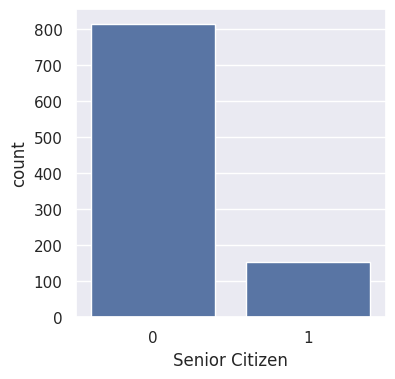

In [ ]:
sns.countplot(x="Senior Citizen", data=df)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Churn"), df['Churn'], test_size=.2)
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7989690721649485


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Churn"), df['Churn'], test_size=.2, random_state=42) # Added random_state for reproducibility

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
rf_preds = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.8195876288659794


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)

logreg_preds = logreg_classifier.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_preds)
print(f"Logistic Regression Accuracy: {logreg_accuracy}")

Logistic Regression Accuracy: 0.8402061855670103


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df.corr()

,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,Debit Card,MobileApp,TechSupport Availed,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn
Gender,1.000000,-0.024769,0.007777,0.010117,0.045210,0.014293,0.025657,-0.022643,-0.052586,0.012952,0.013083,0.001474,0.009762,0.040922,0.058295,-0.047353,-0.005972,0.035811,-0.011394
Senior Citizen,-0.024769,1.000000,0.028707,-0.177606,-0.024807,-0.025251,0.093536,0.211691,-0.011652,0.050843,0.060623,-0.070946,0.081532,0.092289,-0.163630,0.135454,0.172530,0.051541,0.130630
Marital Status,0.007777,0.028707,1.000000,0.499816,0.361254,0.016896,0.121966,-0.007887,0.143456,0.142799,0.138438,0.107310,0.120369,0.123108,0.257478,0.009727,0.092426,0.312685,-0.139181
Dependents,0.010117,-0.177606,0.499816,1.000000,0.197701,0.012268,0.002406,-0.163170,0.110987,0.036937,0.066107,0.046360,0.045348,0.031136,0.272324,-0.094354,-0.070286,0.129127,-0.180724
tenure in months,0.045210,-0.024807,0.361254,0.197701,1.000000,-0.006712,0.370298,0.039958,0.295150,0.335916,0.355797,0.319420,0.294369,0.295350,0.687751,0.054737,0.251880,0.828165,-0.350745
Priority Account,0.014293,-0.025251,0.016896,0.012268,-0.006712,1.000000,0.279462,0.111887,-0.098239,-0.059426,-0.047580,-0.087260,-0.048979,-0.039915,-0.008878,-0.008442,0.252902,0.098958,0.009352
Credit Cards,0.025657,0.093536,0.121966,0.002406,0.370298,0.279462,1.000000,0.330229,0.084551,0.173007,0.207077,0.099136,0.242314,0.281028,0.158432,0.184976,0.479183,0.499993,-0.007551
Loan Account,-0.022643,0.211691,-0.007887,-0.163170,0.039958,0.111887,0.330229,1.000000,0.142858,0.299769,0.317447,0.162403,0.402270,0.404222,-0.265160,0.356383,0.898720,0.411975,0.290804
Netbanking,-0.052586,-0.011652,0.143456,0.110987,0.295150,-0.098239,0.084551,0.142858,1.000000,0.225593,0.250641,0.342607,0.177685,0.181795,0.224339,0.006699,0.280985,0.377790,-0.169838
Debit Card,0.012952,0.050843,0.142799,0.036937,0.335916,-0.059426,0.173007,0.299769,0.225593,1.000000,0.272795,0.274082,0.306188,0.292737,0.151993,0.148704,0.434305,0.479881,-0.059481


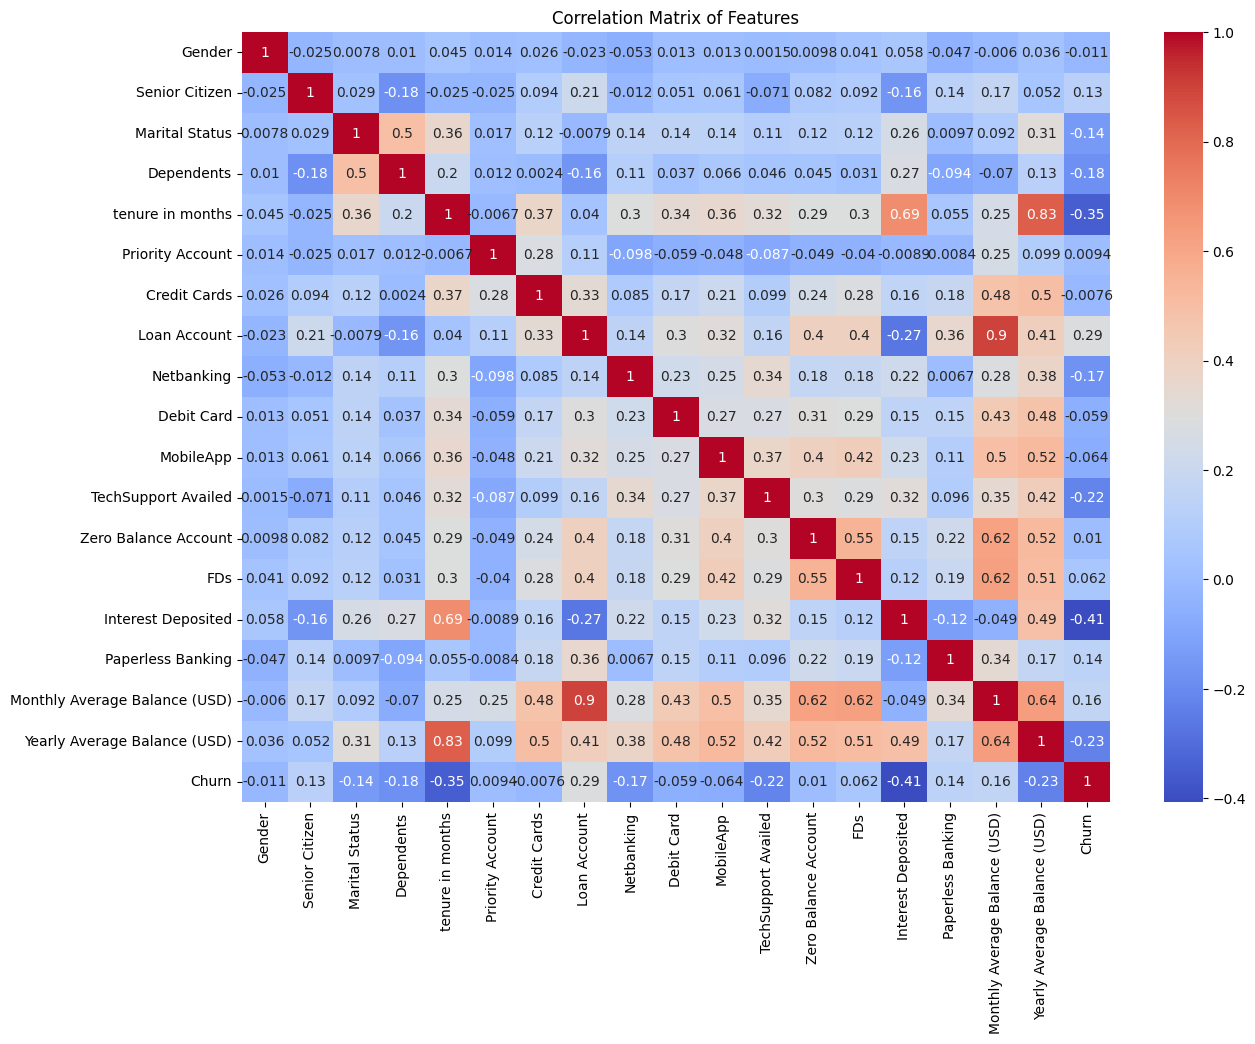

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
correlation_with_churn = df.corr()['Churn'].drop('Churn')

# Identify top factors affecting churn (positive or negative)
top_factors = correlation_with_churn.abs().sort_values(ascending=False)

# Print the top factors and their correlations
print("Top Factors Affecting Churn:")
print(top_factors)

Top Factors Affecting Churn:
Interest Deposited               0.406923
tenure in months                 0.350745
Loan Account                     0.290804
Yearly Average Balance (USD)     0.225708
TechSupport Availed              0.220889
Dependents                       0.180724
Netbanking                       0.169838
Monthly Average Balance (USD)    0.159218
Paperless Banking                0.142433
Marital Status                   0.139181
Senior Citizen                   0.130630
MobileApp                        0.064497
FDs                              0.061522
Debit Card                       0.059481
Gender                           0.011394
Zero Balance Account             0.009982
Priority Account                 0.009352
Credit Cards                     0.007551
Name: Churn, dtype: float64


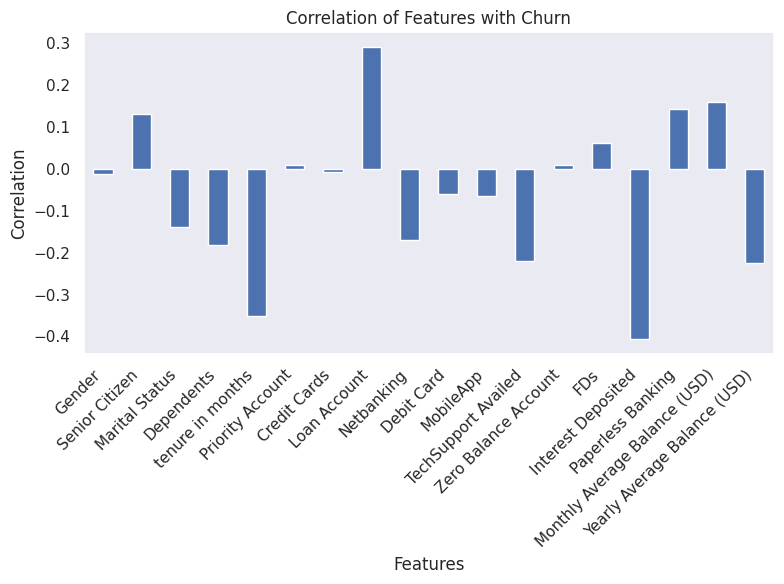

In [ ]:
plt.figure(figsize=(8, 6))
correlation_with_churn.plot(kind='bar')
plt.title('Correlation of Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
df2=pd.read_excel('customer churn data_usecase2_Hackathon.xlsx')

In [ ]:
df2

,customerID,Gender,Senior Citizen,Marital Status,Dependents,tenure in months,Priority Account,Credit Cards,Loan Account,Netbanking,...,Zero Balance Account,FDs,Interest Deposited,Paperless Banking,Monthly Average Balance (USD),Yearly Average Balance (USD),Churn,Customer Feedback,Category,Recommendation
0,5522-JBWMO,Male,0,No,Yes,1.0,Yes,No,general loan,No,...,No,No,Month-to-month,No,44.00,44,No,My Credit Card is not generating OTP.,Credit Card,NaN
1,5275-PMFUT,Male,0,Yes,Yes,72.0,No,No,general loan,Yes,...,Yes,Yes,Two year,Yes,64.80,4719.75,No,The Current Account charges are too high.,Current Account,NaN
2,5609-CEBID,Female,1,No,No,20.0,Yes,Yes,top up loan,No,...,No,Yes,Month-to-month,Yes,94.10,1782.4,Yes,The loan prepayment charges are too high.,Loans,NaN
3,4381-MHQDC,Female,0,No,No,47.0,Yes,Yes,general loan,Yes,...,No,No,Two year,Yes,65.00,2879.9,No,The Savings Account opening process was very s...,Savings Account,NaN
4,6353-BRMMA,Female,0,Yes,Yes,54.0,Yes,Yes,top up loan,Yes,...,Yes,Yes,Month-to-month,Yes,104.10,5645.8,No,The loan documentation process is very complic...,Loans,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,4625-LAMOB,Male,0,No,No,44.0,Yes,No,No,No,...,No,No,Two year,No,20.40,905.55,No,The Current Account customer service is very p...,Current Account,NaN
995,5386-THSLQ,Female,1,Yes,No,66.0,No,No,general loan,No,...,Yes,No,One year,No,45.55,3027.25,No,The Current Account opening process was very e...,Current Account,NaN
996,7102-JJVTX,Female,0,Yes,Yes,9.0,Yes,No,general loan,Yes,...,No,No,One year,No,48.60,422.3,No,The branch staff are very courteous and helpful.,Branch Service,NaN
997,4115-BNPJY,Male,0,Yes,Yes,29.0,Yes,No,general loan,No,...,Yes,Yes,Two year,No,75.55,2054.4,No,How do I activate my new Debit Card?,Debit Cards,NaN


In [ ]:
df2=df2['Customer Feedback']